Name: Ambica Srvastava

Roll Number: N076

SAP ID: 70472019232

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [ ]:
df.replace(0,df.mode(axis=1),inplace=True)


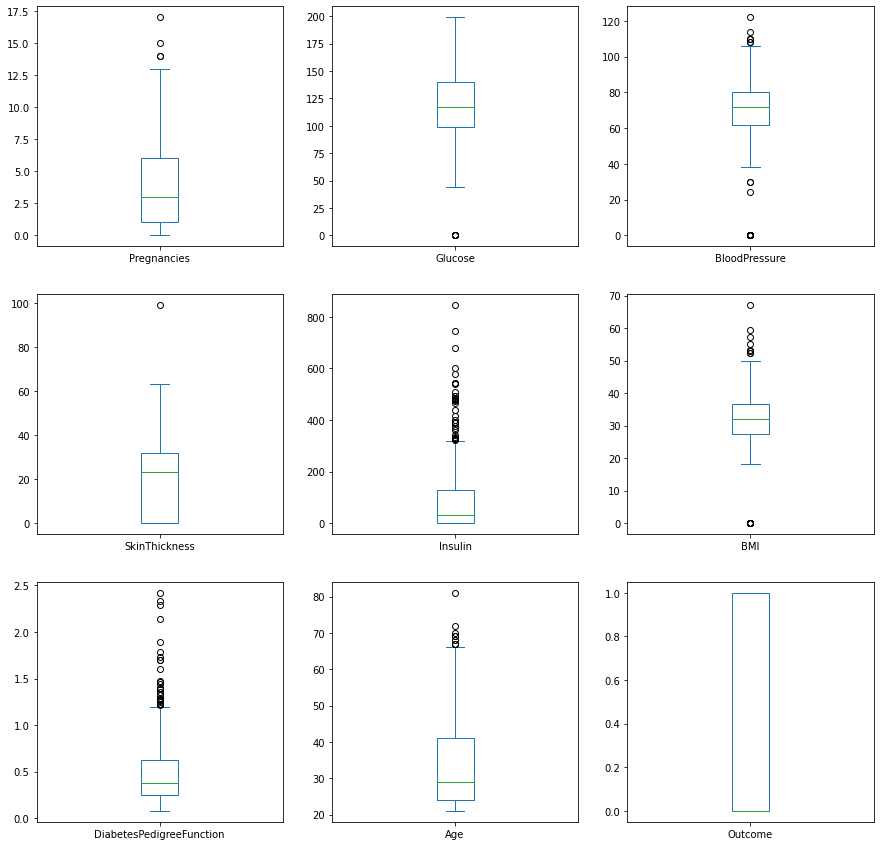

In [ ]:
df.plot(kind='box',figsize=(15,15),subplots=True,layout=(3,3))
plt.show()

In [ ]:
df.shape

(768, 9)

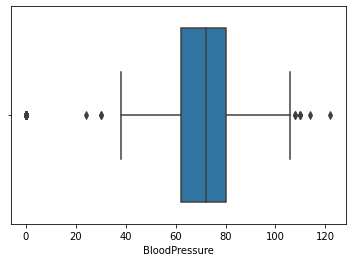

In [ ]:
sns.boxplot(df['BloodPressure'])

In [ ]:
percentile75Depth = df['BloodPressure'].quantile(0.75)
percentile25Depth = df['BloodPressure'].quantile(0.25)
iqr= percentile75Depth-percentile25Depth
print(percentile25Depth,percentile75Depth)

62.0 80.0


In [ ]:
df.shape

(768, 9)

In [ ]:
x=df.drop(['SkinThickness'],axis=1)
y=df['SkinThickness']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [ ]:
y.head()

0    35
1    29
2     0
3    23
4    35
Name: SkinThickness, dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6818181818181818
